How to do?
- ~~matchType~~ (1차 전처리 때 완료)
- ~~rideDistance~~ (완)
- ~~swimDistance~~ (완)
- ~~walkDistance~~ (완)
- weaponsAcquired (To do)
- ~~vehicleDestroys~~ (완)
- Feature Importance 찾아보기
<br><br>
Traget column
- winPlacePerc

## Distance

In [202]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [39]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [40]:
train = pd.read_csv('data/featured_train_2.csv')
train = reduce_mem_usage(train)

In [50]:
pd.set_option('display.max_columns', 30)

train.head(5)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,longestKill,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,matchType2,cat_numGroups
0,0,0,0.00000,0,0,0,60,0,0.00000,0,0.00000,0.00000,0,244.75000,1,0.44434,4,0
1,0,0,91.50000,0,0,0,57,0,0.00000,0,0.00450,11.03906,0,1434.00000,5,0.64014,4,0
2,1,0,68.00000,0,0,0,47,0,0.00000,0,0.00000,0.00000,0,161.75000,2,0.77539,2,1
3,0,0,32.90625,0,0,0,75,0,0.00000,0,0.00000,0.00000,0,202.75000,3,0.16675,4,0
4,0,0,100.00000,0,0,0,45,1,58.53125,0,0.00000,0.00000,0,49.75000,2,0.18750,1,2


In [41]:
distanTest = train.copy()

In [62]:
distanTest = distanTest[['rideDistance','swimDistance','walkDistance','winPlacePerc']]
distanTest.head(5)

,rideDistance,swimDistance,walkDistance,winPlacePerc
0,0.00000,0.00000,244.75000,0.44434
1,0.00450,11.03906,1434.00000,0.64014
2,0.00000,0.00000,161.75000,0.77539
3,0.00000,0.00000,202.75000,0.16675
4,0.00000,0.00000,49.75000,0.18750


In [43]:
pd.options.display.float_format = '{:.5f}'.format

distanTest.describe()

,rideDistance,swimDistance,walkDistance,winPlacePerc
count,4446965.00000,4446965.00000,4446965.00000,4446965.00000
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.00000
min,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,155.12500,0.19995
50%,0.00000,0.00000,685.50000,0.45825
75%,0.19104,0.00000,1976.00000,0.74072
max,40704.00000,3824.00000,25776.00000,1.00000


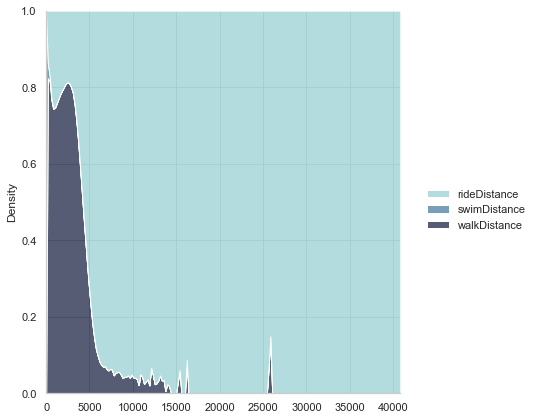

In [44]:
sns.set_theme(style="whitegrid")

seatest = distanTest.drop(columns=['winPlacePerc'])

# Load the diamonds dataset
diamonds = seatest

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=seatest,
   
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

### walkDistance

In [168]:
walk = distanTest.copy()

/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


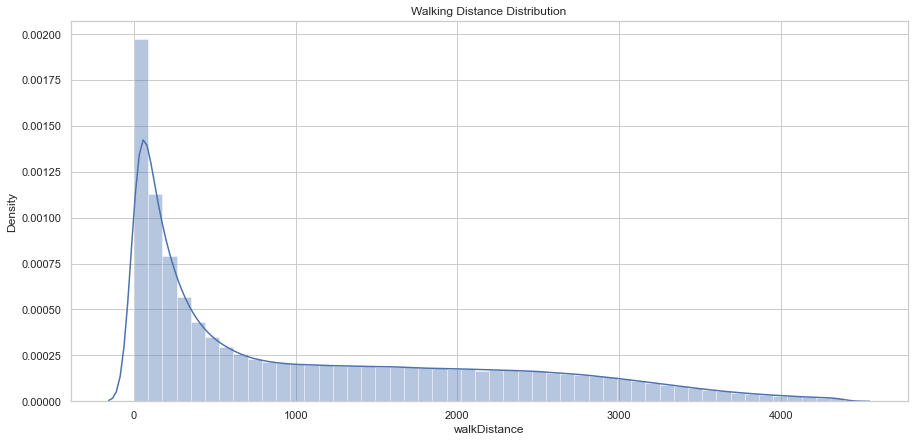

In [27]:
walk = walk[walk['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,7))
plt.title("Walking Distance Distribution")
sns.distplot(walk['walkDistance'])
plt.show()

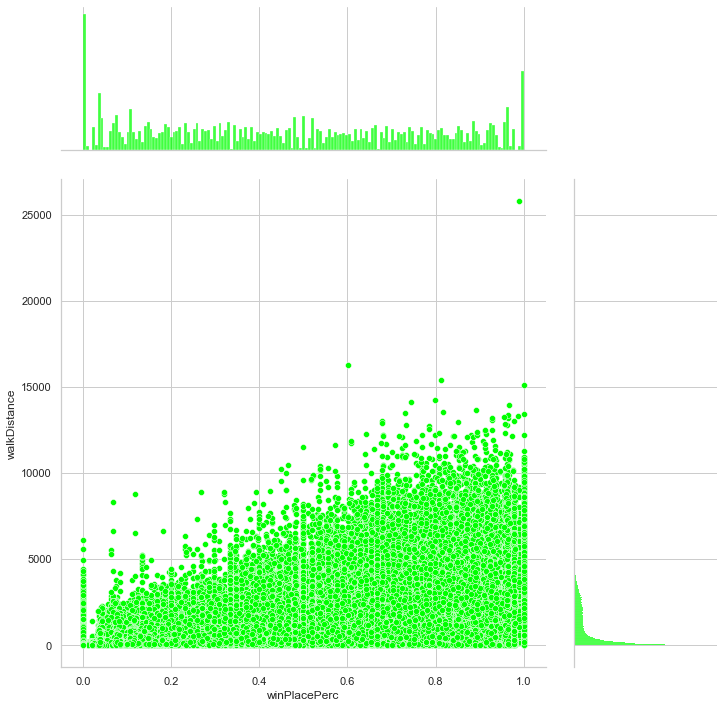

In [36]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=distanTest, height=10, ratio=3, color="lime")
plt.show()

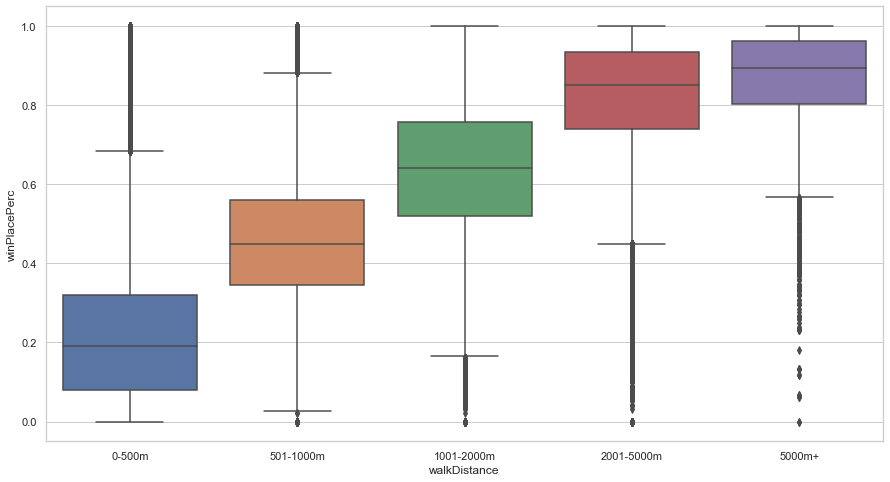

In [54]:
walk = distanTest.copy()

walk['walkDistance'] = pd.cut(walk['walkDistance'], [0, 500, 1000, 2000, 5000, 25776], labels=['0-500m','501-1000m', '1001-2000m', '2001-5000m','5000m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="walkDistance", y="winPlacePerc", data=walk)
plt.show()

#### How to Feature_engineering about walkDistance

- walkDistance의 corr은 Target Val와 큰 유사성을 가짐
- Dintance의 경우, 오래 걸을수록 승률이 높아짐 == 오랫동안 생존했기 때문에 이동 시간이 자연스럽게 길어짐
- 카테고리컬하게 정리가 가능한 boxplot의 형태를 보여줌
- 0~500, 501~1000, 1001~2000, 2001~5000, 5001 ~ 로 나눠서 카테고리컬하게 묶음

In [169]:
walk.head(15)

,rideDistance,swimDistance,walkDistance,winPlacePerc
0,0.00000,0.00000,244.75000,0.44434
1,0.00450,11.03906,1434.00000,0.64014
2,0.00000,0.00000,161.75000,0.77539
3,0.00000,0.00000,202.75000,0.16675
4,0.00000,0.00000,49.75000,0.18750
5,0.00000,0.00000,34.68750,0.03699
6,0.00000,0.00000,13.50000,0.00000
7,2004.00000,0.00000,1089.00000,0.73682
8,0.00000,0.00000,800.00000,0.37036
9,0.00000,0.00000,65.68750,0.21436


In [170]:
# cat_walkDistance 칼럼을 생성
walk['cat_walkDistance'] = pd.NaT

# 500 미만 ⮕ 1
# 500 이상 1000 미만 ⮕ 2
# 1000 이상 2000 미만 ⮕ 3
# 2000 이상 5000 미만 ⮕ 4

walk.loc[walk['walkDistance'] < 500, 'cat_walkDistance'] = 1
walk.loc[(walk['walkDistance'] >= 500) & (walk['walkDistance'] < 1000), 'cat_walkDistance'] = 2
walk.loc[(walk['walkDistance'] >= 1000) & (walk['walkDistance'] < 2000), 'cat_walkDistance'] = 3
walk.loc[(walk['walkDistance'] >= 2000) & (walk['walkDistance'] < 5000), 'cat_walkDistance'] = 4
walk.loc[walk['walkDistance'] >= 5000, 'cat_walkDistance'] = 5

# walk.drop(columns=['walkDistance'])

walk['cat_walkDistance'] = walk['cat_walkDistance'].astype(int)


In [173]:
walk.head(15)

,rideDistance,swimDistance,walkDistance,winPlacePerc,cat_walkDistance
0,0.00000,0.00000,244.75000,0.44434,1
1,0.00450,11.03906,1434.00000,0.64014,3
2,0.00000,0.00000,161.75000,0.77539,1
3,0.00000,0.00000,202.75000,0.16675,1
4,0.00000,0.00000,49.75000,0.18750,1
5,0.00000,0.00000,34.68750,0.03699,1
6,0.00000,0.00000,13.50000,0.00000,1
7,2004.00000,0.00000,1089.00000,0.73682,3
8,0.00000,0.00000,800.00000,0.37036,2
9,0.00000,0.00000,65.68750,0.21436,1


### otherDistance

#### rideDistance

/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


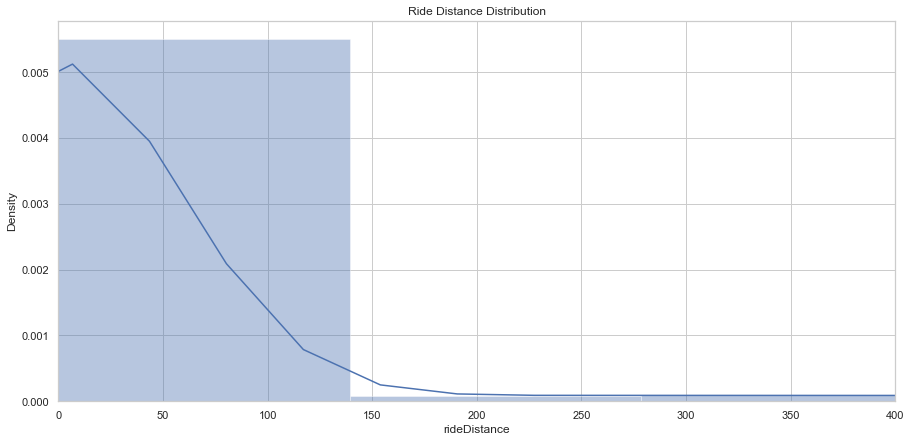

In [92]:
ride = distanTest.copy()
ride = ride[ride['rideDistance'] < train['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,7))
plt.xlim(0, 400)
plt.title("Ride Distance Distribution")
sns.distplot(ride['rideDistance'])
plt.show()

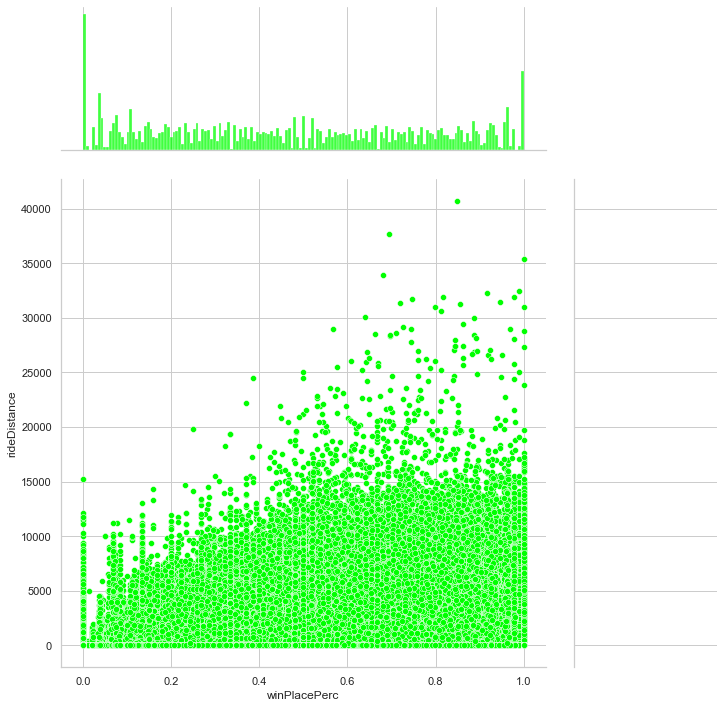

In [26]:
sns.jointplot(x="winPlacePerc", y="rideDistance",  data=distanTest, height=10, ratio=3, color="lime")
plt.show()

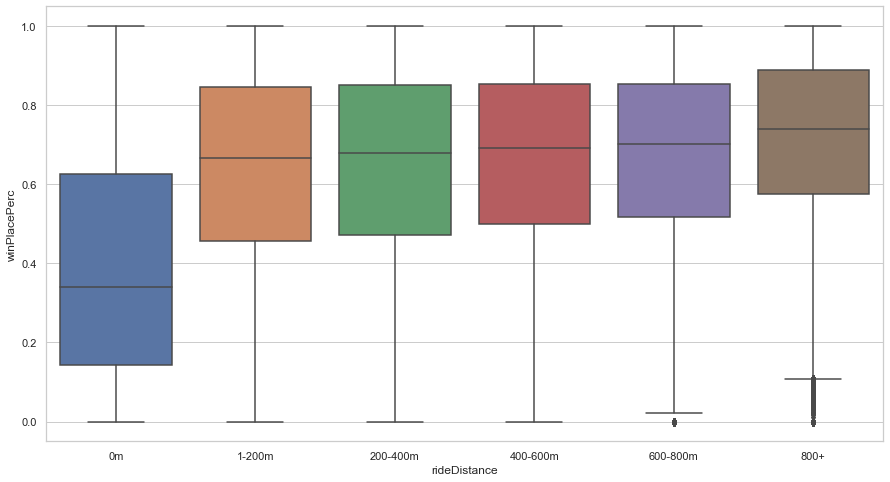

In [34]:
ride = distanTest.copy()

ride['rideDistance'] = pd.cut(ride['rideDistance'], [-1, 0, 200, 400, 600, 800, 40704], labels=['0m', '1-200m','200-400m', '400-600m', '600-800m','800+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="rideDistance", y="winPlacePerc", data=ride)
plt.show()

#### swimDistance

/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


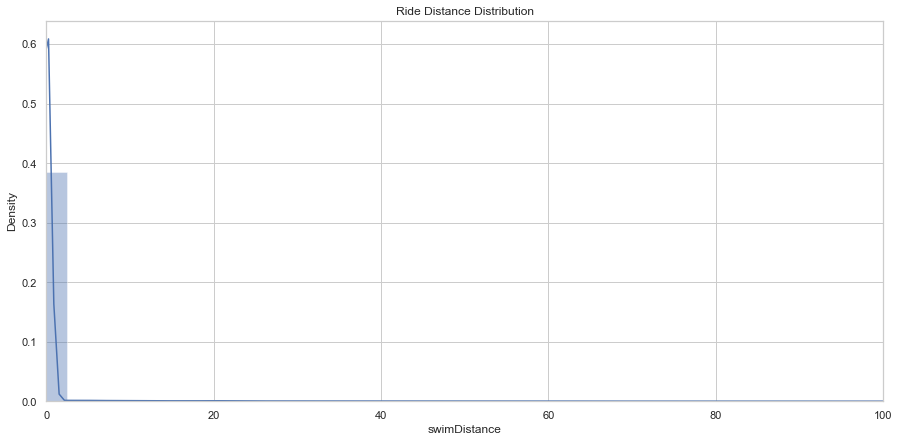

In [103]:
swim = distanTest.copy()
swim = swim[swim['swimDistance'] < train['swimDistance'].quantile(0.99)]
plt.figure(figsize=(15,7))
plt.xlim(0, 100)
plt.title("Ride Distance Distribution")
sns.distplot(swim['swimDistance'])
plt.show()

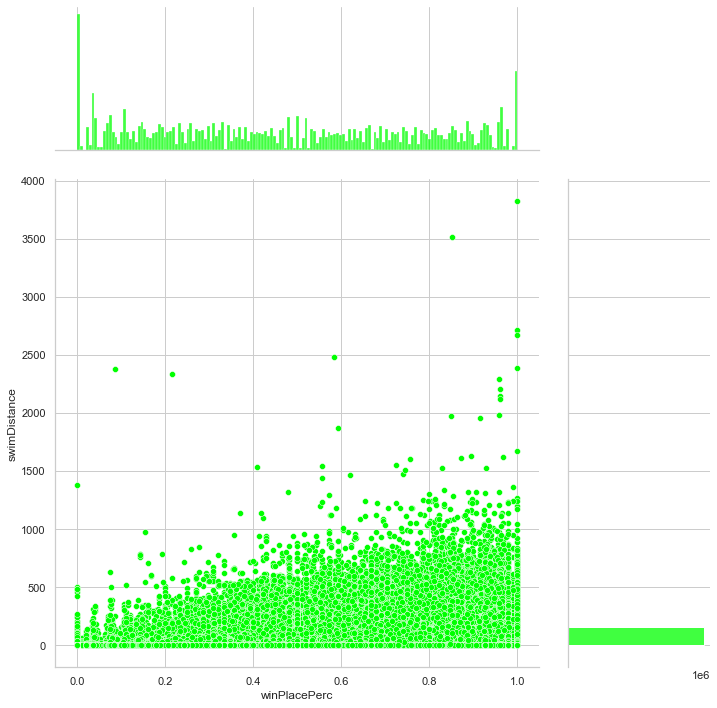

In [37]:
sns.jointplot(x="winPlacePerc", y="swimDistance",  data=swim, height=10, ratio=3, color="lime")
plt.show()

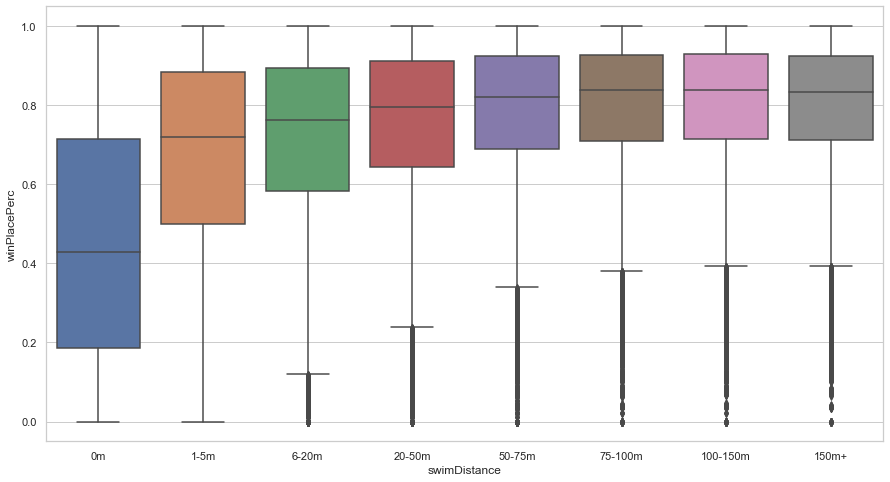

In [33]:
swim = distanTest.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 50, 75, 100, 150, 5286], labels=['0m','1-5m', '6-20m', '20-50m', '50-75m', '75-100m', '100-150m','150m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

#### How to Feature_engineering about rideDistance and swimDistance

How to do?
- rideDistance와 swimDistance는 walkDistance와 비교했을 때 모수가 굉장히 낮다.
- 그렇기에 낮은 모수를 중심으로 진행한다면 영향을 줄 수 없을 것으로 판단
- rideDistance와 swimDistance를 합쳐서 새로운 피쳐를 만들어 모수의 크기를 증가시킬 것
- 이후 카테고리칼 작업을 통해서 모델에 주는 영향력을 키우려한다.

1. rideDistance와 swimDistance를 합하여 새로운 피쳐 만들기

In [150]:
rideAndswim = distanTest.copy()

In [151]:
rideAndswim['sum_rideAndswim'] = pd.NaT
rideAndswim['sum_rideAndswim'] = rideAndswim['rideDistance'] + rideAndswim['swimDistance']
rideAndswim.head(5)

,rideDistance,swimDistance,walkDistance,winPlacePerc,sum_rideAndswim
0,0.00000,0.00000,244.75000,0.44434,0.00000
1,0.00450,11.03906,1434.00000,0.64014,11.04688
2,0.00000,0.00000,161.75000,0.77539,0.00000
3,0.00000,0.00000,202.75000,0.16675,0.00000
4,0.00000,0.00000,49.75000,0.18750,0.00000


In [104]:
rideAndswim['sum_rideAndswim'].describe()

count   4402252.00000
mean              NaN
std               NaN
min           0.00000
25%           0.00000
50%           0.00000
75%          68.25000
max        6964.00000
Name: sum_rideAndswim, dtype: float64

/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


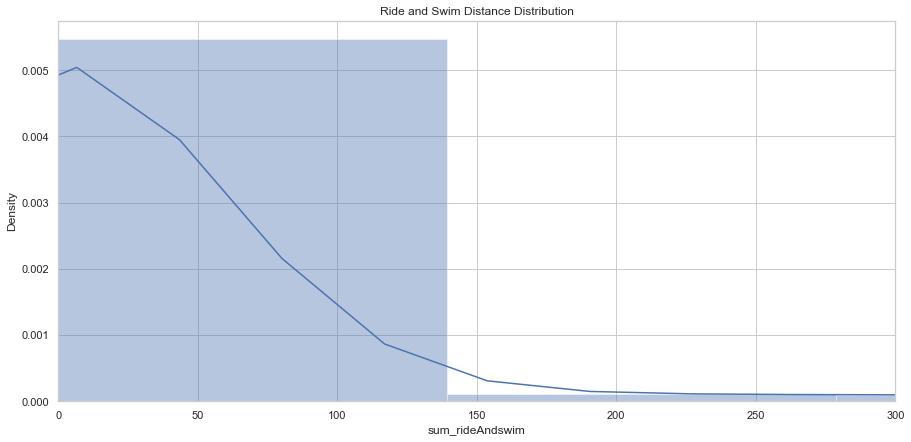

In [100]:
rideAndswim = rideAndswim[rideAndswim['sum_rideAndswim'] < train['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,7))
plt.xlim(0, 300)
plt.title("Ride and Swim Distance Distribution")
sns.distplot(rideAndswim['sum_rideAndswim'])
plt.show()

In [152]:
print("* 데이터 타입, 데이터프레임 정보 확인")
print("----------------------------------------------------------------------")
rideAndswim.info()
print()
print("* 데이터 칼럼별 결측값 확인")
print("----------------------------------------------------------------------")
rideAndswim.isnull().sum()

* 데이터 타입, 데이터프레임 정보 확인
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446965 entries, 0 to 4446964
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   rideDistance     float16
 1   swimDistance     float16
 2   walkDistance     float16
 3   winPlacePerc     float16
 4   sum_rideAndswim  float16
dtypes: float16(5)
memory usage: 42.4 MB

* 데이터 칼럼별 결측값 확인
----------------------------------------------------------------------


rideDistance       0
swimDistance       0
walkDistance       0
winPlacePerc       0
sum_rideAndswim    0
dtype: int64

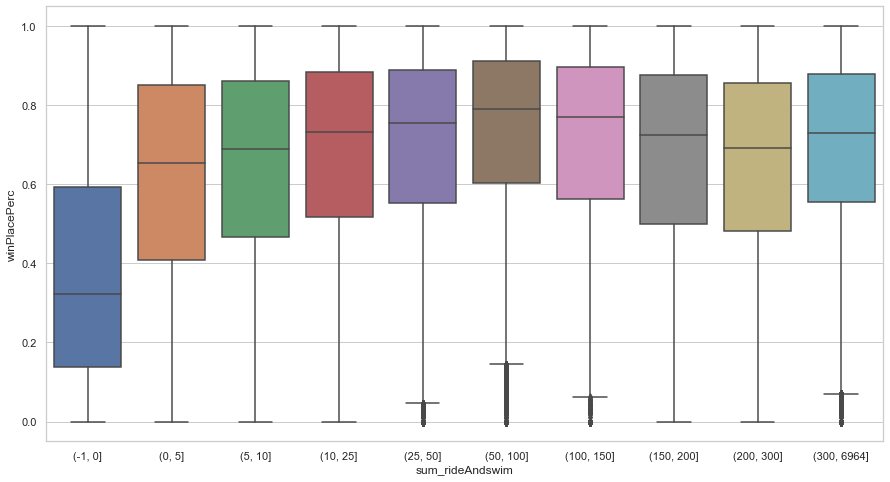

In [138]:
rideAndswim['sum_rideAndswim'] = \
pd.cut(rideAndswim['sum_rideAndswim'],[-1, 0, 5, 10, 25, 50, 100, 150, 200, 300, 6964])

plt.figure(figsize=(15,8))
sns.boxplot(x="sum_rideAndswim", y="winPlacePerc", data=rideAndswim)
plt.show()

Testcase 정의
1. 각 분포별로 카테고리컬하게 자른 Feature_engineering
2. 탈 것을 통한 이동 혹은 수영을 했는지 안했는지에 대한 Yes / No 분류 (1, 0)
<br>
- 판단 기준 : 각 모델을  LGBM 모델로 돌려본 뒤 더 성능이 높은 피쳐를 선택

##### 각 분포별로 카테고리컬하게 자른 Feature_engineering

In [196]:
testcase1 = rideAndswim.copy()

In [193]:
print("* 데이터 타입, 데이터프레임 정보 확인")
print("----------------------------------------------------------------------")
testcase1.info()
print()
print("* 데이터 칼럼별 결측값 확인")
print("----------------------------------------------------------------------")
testcase1.isnull().sum()

* 데이터 타입, 데이터프레임 정보 확인
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446965 entries, 0 to 4446964
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   rideDistance     float16
 1   swimDistance     float16
 2   walkDistance     float16
 3   winPlacePerc     float16
 4   sum_rideAndswim  float16
dtypes: float16(5)
memory usage: 42.4 MB

* 데이터 칼럼별 결측값 확인
----------------------------------------------------------------------


rideDistance       0
swimDistance       0
walkDistance       0
winPlacePerc       0
sum_rideAndswim    0
dtype: int64

In [198]:
# cat_walkDistance 칼럼을 생성
testcase1['cat_rideAndswim'] = pd.NaT

# 500 미만 ⮕ 1
# 500 이상 1000 미만 ⮕ 2
# 1000 이상 2000 미만 ⮕ 3
# 2000 이상 5000 미만 ⮕ 4

testcase1.loc[testcase1['sum_rideAndswim'] == 0, 'cat_rideAndswim'] = 0
testcase1.loc[(testcase1['sum_rideAndswim'] > 0) & (testcase1['sum_rideAndswim'] < 50), 'cat_rideAndswim'] = 1
testcase1.loc[(testcase1['sum_rideAndswim'] >= 50) & (testcase1['sum_rideAndswim'] < 100), 'cat_rideAndswim'] = 2
testcase1.loc[(testcase1['sum_rideAndswim'] >= 100) & (testcase1['sum_rideAndswim'] < 200), 'cat_rideAndswim'] = 3
testcase1.loc[(testcase1['sum_rideAndswim'] >= 200) & (testcase1['sum_rideAndswim'] < 300), 'cat_rideAndswim'] = 4
testcase1.loc[testcase1['sum_rideAndswim'] >= 300, 'cat_rideAndswim'] = 5

testcase1['cat_rideAndswim'] = testcase1['cat_rideAndswim'].astype(int)


In [199]:
testcase1.head(5)

,rideDistance,swimDistance,walkDistance,winPlacePerc,sum_rideAndswim,cat_rideAndswim
0,0.00000,0.00000,244.75000,0.44434,0.00000,0
1,0.00450,11.03906,1434.00000,0.64014,11.04688,1
2,0.00000,0.00000,161.75000,0.77539,0.00000,0
3,0.00000,0.00000,202.75000,0.16675,0.00000,0
4,0.00000,0.00000,49.75000,0.18750,0.00000,0


In [200]:
print("* 데이터 타입, 데이터프레임 정보 확인")
print("----------------------------------------------------------------------")
testcase1.info()
print()
print("* 데이터 칼럼별 결측값 확인")
print("----------------------------------------------------------------------")
testcase1.isnull().sum()

* 데이터 타입, 데이터프레임 정보 확인
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446965 entries, 0 to 4446964
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   rideDistance     float16
 1   swimDistance     float16
 2   walkDistance     float16
 3   winPlacePerc     float16
 4   sum_rideAndswim  float16
 5   cat_rideAndswim  int64  
dtypes: float16(5), int64(1)
memory usage: 76.3 MB

* 데이터 칼럼별 결측값 확인
----------------------------------------------------------------------


rideDistance       0
swimDistance       0
walkDistance       0
winPlacePerc       0
sum_rideAndswim    0
cat_rideAndswim    0
dtype: int64

In [201]:
testcase1['cat_rideAndswim'].unique()

array([0, 1, 5, 2, 3, 4])

In [203]:
X = testcase1.drop(columns='winPlacePerc')
y = testcase1['winPlacePerc']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3557572, 5), (889393, 5), (3557572,), (889393,))

In [204]:
model = LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.11300328763318636

- winPlacePerc를 타겟으로 하고, Dinstance와 관련된 칼럼 카테고리컬하게 바꾼 뒤 LGBM을 돌렸을 때, LGBM 값은 0.11300328763318636

##### 탈 것을 통한 이동 혹은 수영을 했는지 안했는지에 대한 Yes / No 분류 (1, 0)

In [212]:
testcase2 = rideAndswim.copy()

In [213]:
# cat_walkDistance 칼럼을 생성
testcase2['binary_rideAndswim'] = pd.NaT

testcase2.loc[testcase2['sum_rideAndswim'] == 0, 'binary_rideAndswim'] = 0
testcase2.loc[testcase2['sum_rideAndswim'] > 0, 'binary_rideAndswim'] = 1

testcase2['binary_rideAndswim'] = testcase2['binary_rideAndswim'].astype(int)


In [214]:
print("* 데이터 타입, 데이터프레임 정보 확인")
print("----------------------------------------------------------------------")
testcase2.info()
print()
print("* 데이터 칼럼별 결측값 확인")
print("----------------------------------------------------------------------")
testcase2.isnull().sum()

* 데이터 타입, 데이터프레임 정보 확인
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446965 entries, 0 to 4446964
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   rideDistance        float16
 1   swimDistance        float16
 2   walkDistance        float16
 3   winPlacePerc        float16
 4   sum_rideAndswim     float16
 5   binary_rideAndswim  int64  
dtypes: float16(5), int64(1)
memory usage: 76.3 MB

* 데이터 칼럼별 결측값 확인
----------------------------------------------------------------------


rideDistance          0
swimDistance          0
walkDistance          0
winPlacePerc          0
sum_rideAndswim       0
binary_rideAndswim    0
dtype: int64

In [215]:
X = testcase2.drop(columns='winPlacePerc')
y = testcase2['winPlacePerc']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3557572, 5), (889393, 5), (3557572,), (889393,))

In [216]:
model = LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.11300176627902339

- winPlacePerc를 타겟으로 하고, Dinstance와 관련된 칼럼 카테고리컬하게 바꾼 뒤 LGBM을 돌렸을 때, LGBM 값은 0.11300328763318636
- winPlacePerc를 타겟으로 하고, Dinstance와 관련된 칼럼 바이너리하게 바꾼 뒤 LGBM을 돌렸을 때, LGBM 값은 0.11300176627902339

결론 : 바이너리하게 바꾼 값이 모델 성능의 향상에 더 도움이 된다

To do list

- 전체 칼럼을 대상으로 한 성능 테스트 필요

## Distance Modeling

**경우의 수**
1. walk distance의 raw and ride and swim raw
2. walk distance의 raw, ride and swim Feature_engineering - testcase1
3. walk distance의 raw, ride and swim Feature_engineering - testcase2
4. walk distance의 Feature_engineering, ride and swim raw
5. walk distance의 Feature_engineering, ride and swim Feature_engineering - testcase1
6. walk distance의 Feature_engineering, ride and swim Feature_engineering - testcase2

In [219]:
testdf = train.copy()

In [220]:
# Dataframe
# testdf - default df
# walk - walkdistance categorycal
# testcase1 - sum ride and swim columns
# testcase2 - sum ride and swim columns, make categorycal

## vehicleDestroys

In [221]:
destroy = train.copy()

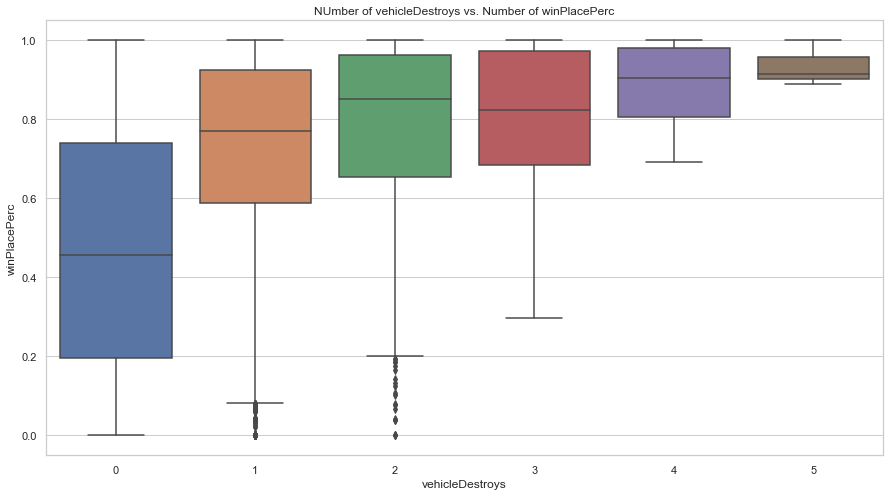

In [222]:
plt.figure(figsize=(15,8))
ax4 = sns.boxplot(x="vehicleDestroys",y="winPlacePerc", data = destroy)
ax4.set_title("NUmber of vehicleDestroys vs. Number of winPlacePerc")
plt.show()

In [223]:
destroy.head(5)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,longestKill,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,matchType2,cat_numGroups
0,0,0,0.00000,0,0,0,60,0,0.00000,0,0.00000,0.00000,0,244.75000,1,0.44434,4,0
1,0,0,91.50000,0,0,0,57,0,0.00000,0,0.00450,11.03906,0,1434.00000,5,0.64014,4,0
2,1,0,68.00000,0,0,0,47,0,0.00000,0,0.00000,0.00000,0,161.75000,2,0.77539,2,1
3,0,0,32.90625,0,0,0,75,0,0.00000,0,0.00000,0.00000,0,202.75000,3,0.16675,4,0
4,0,0,100.00000,0,0,0,45,1,58.53125,0,0.00000,0.00000,0,49.75000,2,0.18750,1,2


In [224]:
# cat_walkDistance 칼럼을 생성
destroy['cat_vehicleDestroys'] = pd.NaT

# 500 미만 ⮕ 1
# 500 이상 1000 미만 ⮕ 2
# 1000 이상 2000 미만 ⮕ 3
# 2000 이상 5000 미만 ⮕ 4

destroy.loc[destroy['vehicleDestroys'] == 0, 'cat_vehicleDestroys'] = 0
destroy.loc[(destroy['vehicleDestroys'] >= 1) & (destroy['vehicleDestroys'] <= 2), 'cat_vehicleDestroys'] = 1
destroy.loc[destroy['vehicleDestroys'] >= 3, 'cat_vehicleDestroys'] = 3

# walk.drop(columns=['walkDistance'])

destroy['cat_vehicleDestroys'] = destroy['cat_vehicleDestroys'].astype(int)


In [225]:
destroy.head(5)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,longestKill,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,matchType2,cat_numGroups,cat_vehicleDestroys
0,0,0,0.00000,0,0,0,60,0,0.00000,0,0.00000,0.00000,0,244.75000,1,0.44434,4,0,0
1,0,0,91.50000,0,0,0,57,0,0.00000,0,0.00450,11.03906,0,1434.00000,5,0.64014,4,0,0
2,1,0,68.00000,0,0,0,47,0,0.00000,0,0.00000,0.00000,0,161.75000,2,0.77539,2,1,0
3,0,0,32.90625,0,0,0,75,0,0.00000,0,0.00000,0.00000,0,202.75000,3,0.16675,4,0,0
4,0,0,100.00000,0,0,0,45,1,58.53125,0,0.00000,0.00000,0,49.75000,2,0.18750,1,2,0


In [227]:
destroy['cat_vehicleDestroys'].unique()

array([0, 1, 3])

## weaponsAcquired

In [228]:
weapon = train.copy()

/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


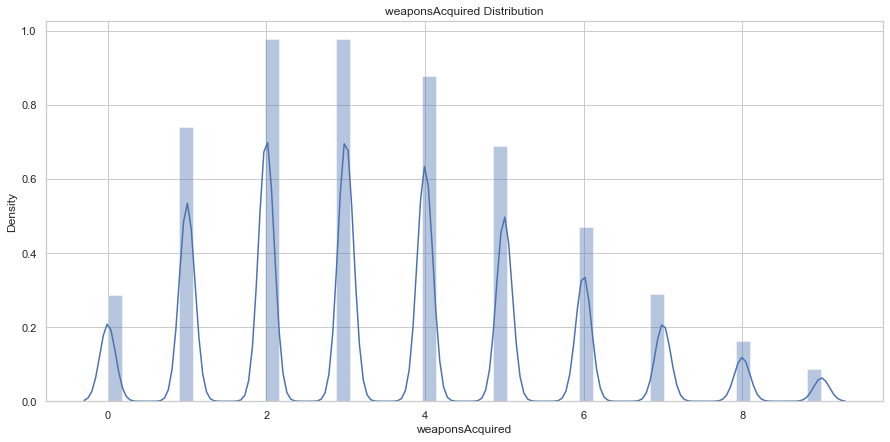

In [229]:
weapon = weapon[weapon['weaponsAcquired'] < train['weaponsAcquired'].quantile(0.99)]
plt.figure(figsize=(15,7))
plt.title("weaponsAcquired Distribution")
sns.distplot(weapon['weaponsAcquired'])
plt.show()

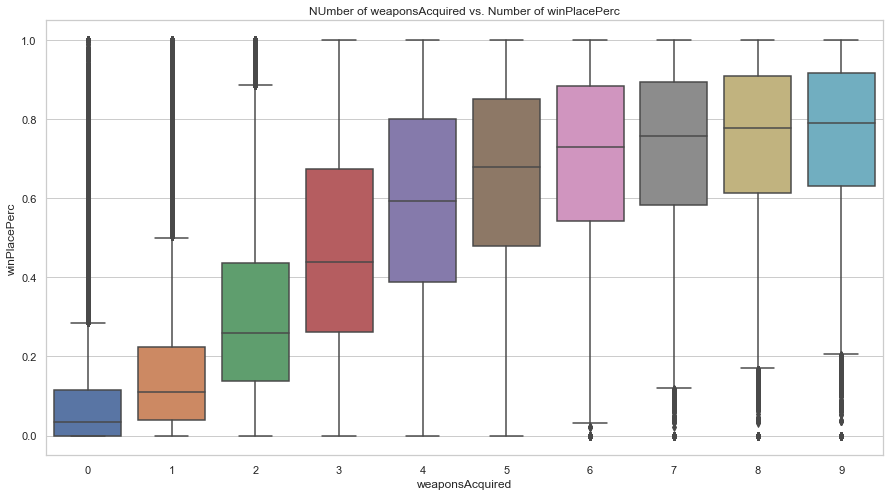

In [230]:
plt.figure(figsize=(15,8))
ax4 = sns.boxplot(x="weaponsAcquired",y="winPlacePerc", data = weapon)
ax4.set_title("NUmber of weaponsAcquired vs. Number of winPlacePerc")
plt.show()

In [231]:
# weaponsAcquired

# cat_vehicleDestroys 칼럼을 생성
weapon['cat_weaponsAcquired'] = pd.NaT

weapon.loc[weapon['weaponsAcquired'] == 0, 'cat_weaponsAcquired'] = 0
weapon.loc[weapon['weaponsAcquired'] == 1, 'cat_weaponsAcquired'] = 1
weapon.loc[(weapon['weaponsAcquired'] >= 2) & (weapon['weaponsAcquired'] <= 3), 'cat_weaponsAcquired'] = 2
weapon.loc[(weapon['weaponsAcquired'] >= 4) & (weapon['weaponsAcquired'] <= 5), 'cat_weaponsAcquired'] = 4
weapon.loc[(weapon['weaponsAcquired'] >= 6) & (weapon['weaponsAcquired'] <= 7), 'cat_weaponsAcquired'] = 6
weapon.loc[(weapon['weaponsAcquired'] >= 8) & (weapon['weaponsAcquired'] <= 9), 'cat_weaponsAcquired'] = 8
weapon.loc[weapon['weaponsAcquired'] >= 10, 'cat_weaponsAcquired'] = 10

# destroy.drop(columns=['weaponsAcquired'])

weapon['cat_weaponsAcquired'] = weapon['cat_weaponsAcquired'].astype(int)


/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


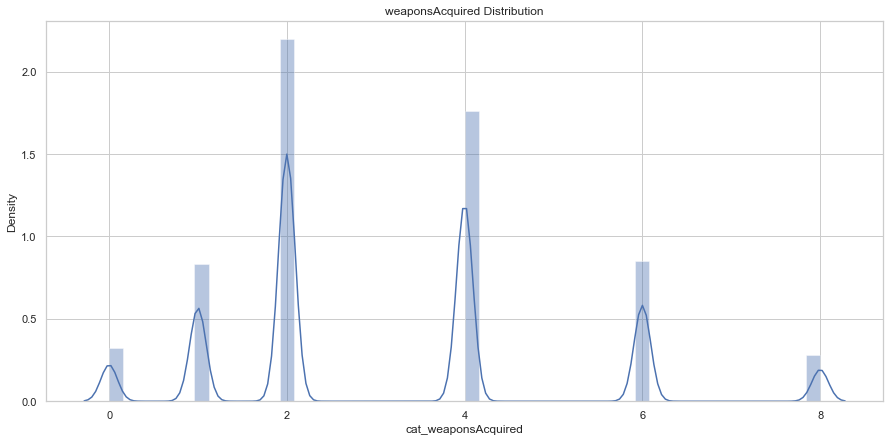

In [234]:
weapon = weapon[weapon['cat_weaponsAcquired'] < train['weaponsAcquired'].quantile(0.99)]
plt.figure(figsize=(15,7))
plt.title("weaponsAcquired Distribution")
sns.distplot(weapon['cat_weaponsAcquired'])
plt.show()

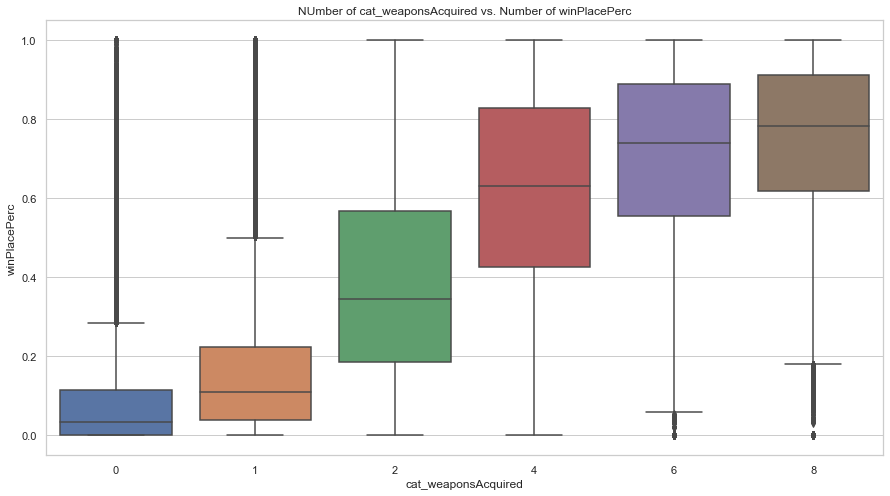

In [235]:
plt.figure(figsize=(15,8))
ax4 = sns.boxplot(x="cat_weaponsAcquired",y="winPlacePerc", data = weapon)
ax4.set_title("NUmber of cat_weaponsAcquired vs. Number of winPlacePerc")
plt.show()